In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [3]:
df.shape

(150000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            150000 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       150000 non-null  object
 4   INCOME_GROUP     150000 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.describe()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,150000.000000,150000.000000,150000.000000
mean,43.805660,2015.507960,11244.207287
std,14.828219,2.685645,8458.166886
min,23.000000,2008.000000,208.000000
25%,30.000000,2013.000000,6034.750000
50%,43.000000,2017.000000,8926.000000
75%,54.000000,2018.000000,13636.000000
max,85.000000,2019.000000,103520.000000


In [7]:
df.isnull().sum()

STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [8]:
df.STATE.value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
                                1842
Himachal Pradesh                1763
Tripura                         1735
Goa                             1735
Chandigarh                      1583
Puducherry                      1503
M

In [9]:
list(df.STATE.values)[30:35]

['Tamil Nadu', ' ', 'Puducherry', 'Sikkim', 'Maharashtra']

In [10]:
df['STATE'].replace(' ','Others',inplace=True)

In [11]:
df['STATE'].value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
Others                          1842
Himachal Pradesh                1763
Tripura                         1735
Goa                             1735
Chandigarh                      1583
Puducherry                      1503
M

In [12]:
df['OCCUPATION'].value_counts()

Self employed    61375
Salaried         44214
                 42777
Business          1634
Name: OCCUPATION, dtype: int64

In [13]:
df['OCCUPATION'].replace(" ","Unemployed",inplace=True)

In [14]:
df['OCCUPATION'].value_counts()

Self employed    61375
Salaried         44214
Unemployed       42777
Business          1634
Name: OCCUPATION, dtype: int64

In [15]:
df['INCOME_GROUP'].value_counts()

Low       63523
High      41808
Medium    41232
           3437
Name: INCOME_GROUP, dtype: int64

In [16]:
df['INCOME_GROUP'].replace(" ","No Income",inplace=True)

In [17]:
df['INCOME_GROUP'].value_counts()

Low          63523
High         41808
Medium       41232
No Income     3437
Name: INCOME_GROUP, dtype: int64

In [18]:
df['CUSTOMER_SINCE'].value_counts()

2018    44924
2017    37693
2012    12757
2014    10406
2015     9880
2013     9160
2011     8260
2016     7149
2010     5854
2009     2710
2019     1173
2008       34
Name: CUSTOMER_SINCE, dtype: int64

In [19]:
df['LOYALTY_PROGRAM'].value_counts()

No     88182
Yes    43994
Name: LOYALTY_PROGRAM, dtype: int64

In [20]:
df.ffill(axis=0,inplace=True)

In [21]:
df['LOYALTY_PROGRAM'].isnull().sum()

0

In [22]:
df.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,Unemployed,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,Unemployed,High,2013,No,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [23]:
df_target = df['PURCHASE']

In [24]:
df_feature = df.drop(['PURCHASE'],axis=1)

In [25]:
df_feature['INCOME_GROUP'].value_counts()

Low          63523
High         41808
Medium       41232
No Income     3437
Name: INCOME_GROUP, dtype: int64

In [26]:
ordinalencode = OrdinalEncoder(categories=[['No Income','Low','Medium','High']])

In [27]:
df_feature['INCOME_GROUP'] = ordinalencode.fit_transform(df_feature[['INCOME_GROUP']])

In [28]:
df_feature['INCOME_GROUP'] = df_feature['INCOME_GROUP'].astype(int)

In [29]:
df_feature['INCOME_GROUP'].dtype

dtype('int32')

In [30]:
df_feature.head(15)

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,Uttar Pradesh,28,Unemployed,1,2018,No,4937
1,Madhya Pradesh,27,Salaried,1,2018,No,10834
2,West Bengal,62,Unemployed,3,2013,No,8610
3,Tamil Nadu,27,Salaried,1,2018,No,14374
4,Uttar Pradesh,40,Self employed,3,2015,No,13158
5,Maharashtra,28,Salaried,1,2018,No,5159
6,Tamil Nadu,68,Unemployed,3,2010,No,12780
7,Maharashtra,45,Self employed,2,2018,No,5018
8,West Bengal,56,Self employed,2,2014,Yes,7238
9,Tamil Nadu,67,Unemployed,3,2010,Yes,25120


In [31]:
labelencode = LabelEncoder()

In [32]:
df_feature['OCCUPATION'] = labelencode.fit_transform(df_feature['OCCUPATION'])

In [33]:

print(pd.datetime.now().year)

2021


In [34]:
df_feature['SERVICE_YEARS'] = (pd.datetime.now().year) - df_feature['CUSTOMER_SINCE']

In [35]:
df_feature.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,SERVICE_YEARS
0,Uttar Pradesh,28,3,1,2018,No,4937,3
1,Madhya Pradesh,27,1,1,2018,No,10834,3
2,West Bengal,62,3,3,2013,No,8610,8
3,Tamil Nadu,27,1,1,2018,No,14374,3
4,Uttar Pradesh,40,2,3,2015,No,13158,6


In [36]:
df_feature.drop(['CUSTOMER_SINCE'],axis=1,inplace=True)

In [37]:
df_feature.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,LOYALTY_PROGRAM,PAST_PURCHASE,SERVICE_YEARS
0,Uttar Pradesh,28,3,1,No,4937,3
1,Madhya Pradesh,27,1,1,No,10834,3
2,West Bengal,62,3,3,No,8610,8
3,Tamil Nadu,27,1,1,No,14374,3
4,Uttar Pradesh,40,2,3,No,13158,6


In [38]:
df_cat = df_feature[['STATE','PAST_PURCHASE']]

In [39]:
state_dummies = pd.get_dummies(df_feature['STATE'],drop_first=True)

In [40]:
state_dummies.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
df_feature = pd.concat([df_feature,state_dummies],axis=1)

In [42]:
df_feature.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,LOYALTY_PROGRAM,PAST_PURCHASE,SERVICE_YEARS,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Uttar Pradesh,28,3,1,No,4937,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Madhya Pradesh,27,1,1,No,10834,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,West Bengal,62,3,3,No,8610,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Tamil Nadu,27,1,1,No,14374,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Uttar Pradesh,40,2,3,No,13158,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
df_feature.drop(['STATE'],axis=1,inplace=True)

In [44]:
df_feature.head()

,AGE,OCCUPATION,INCOME_GROUP,LOYALTY_PROGRAM,PAST_PURCHASE,SERVICE_YEARS,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,28,3,1,No,4937,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,27,1,1,No,10834,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,62,3,3,No,8610,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,27,1,1,No,14374,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,40,2,3,No,13158,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
df_feature['LOYALTY_PROGRAM'].value_counts()

No     100029
Yes     49971
Name: LOYALTY_PROGRAM, dtype: int64

In [46]:
loyalty_dummies = pd.get_dummies(df_feature['LOYALTY_PROGRAM'],drop_first=True,columns=['LOYALTY_PROGRAM'])

In [47]:
df_feature.drop(['LOYALTY_PROGRAM'],axis=1,inplace=True)

In [48]:
df_feature = pd.concat([df_feature,loyalty_dummies],axis=1)

In [49]:
df_feature.shape

(150000, 39)

In [50]:
df_feature.describe()

,AGE,OCCUPATION,INCOME_GROUP,PAST_PURCHASE,SERVICE_YEARS,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Yes
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,43.805660,1.968633,1.809407,11244.207287,5.492040,0.031873,0.007100,0.017587,0.021500,0.010553,0.015773,0.023813,0.011567,0.052427,0.021313,0.011753,0.013080,0.014947,0.077927,0.024787,0.024533,0.146453,0.007387,0.008207,0.006560,0.007553,0.018487,0.012280,0.010020,0.020753,0.030807,0.008000,0.118907,0.031887,0.011567,0.109333,0.013227,0.051673,0.333140
std,14.828219,0.789008,0.870367,8458.166886,2.685645,0.175663,0.083962,0.131444,0.145044,0.102186,0.124598,0.152468,0.106925,0.222887,0.144427,0.107774,0.113618,0.121340,0.268057,0.155475,0.154698,0.353561,0.085628,0.090218,0.080728,0.086581,0.134703,0.110133,0.099598,0.142558,0.172794,0.089085,0.323680,0.175699,0.106925,0.312058,0.114245,0.221367,0.471338
min,23.000000,0.000000,0.000000,208.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,6034.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,2.000000,2.000000,8926.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,3.000000,3.000000,13636.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,85.000000,3.000000,3.000000,103520.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
to_be_scaled = df_feature[['AGE','PAST_PURCHASE','SERVICE_YEARS']]

In [52]:
age_mean = df_feature['AGE'].mean()
past_purchase_mean = df_feature['PAST_PURCHASE'].mean()
service_years_mean = df_feature['SERVICE_YEARS'].mean()

age_std = df_feature['AGE'].std()
past_purchase_std= df_feature['PAST_PURCHASE'].std()
service_years_std = df_feature['SERVICE_YEARS'].std()

In [53]:
to_be_scaled.describe()

,AGE,PAST_PURCHASE,SERVICE_YEARS
count,150000.000000,150000.000000,150000.000000
mean,43.805660,11244.207287,5.492040
std,14.828219,8458.166886,2.685645
min,23.000000,208.000000,2.000000
25%,30.000000,6034.750000,3.000000
50%,43.000000,8926.000000,4.000000
75%,54.000000,13636.000000,8.000000
max,85.000000,103520.000000,13.000000


In [54]:
scaled  = pd.DataFrame(MinMaxScaler().fit_transform(to_be_scaled),columns=to_be_scaled.columns)

In [55]:
scaled.head()

,AGE,PAST_PURCHASE,SERVICE_YEARS
0,0.080645,0.045774,0.090909
1,0.064516,0.102853,0.090909
2,0.629032,0.081326,0.545455
3,0.064516,0.137119,0.090909
4,0.274194,0.125348,0.363636


In [56]:
df_feature.drop(['AGE','PAST_PURCHASE','SERVICE_YEARS'],axis=1,inplace=True)

In [57]:
df_feature = pd.concat([df_feature,scaled],axis=1)

In [58]:
df_feature.head()

,OCCUPATION,INCOME_GROUP,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Yes,AGE,PAST_PURCHASE,SERVICE_YEARS
0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.080645,0.045774,0.090909
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.064516,0.102853,0.090909
2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.629032,0.081326,0.545455
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.064516,0.137119,0.090909
4,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.274194,0.125348,0.363636


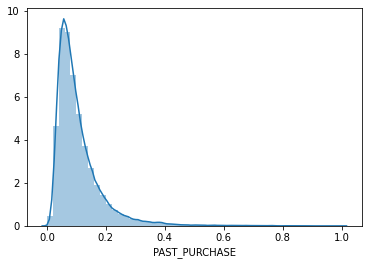

In [59]:
sns.distplot(df_feature['PAST_PURCHASE'])

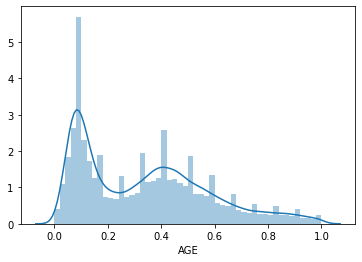

In [60]:
sns.distplot(df_feature['AGE'])

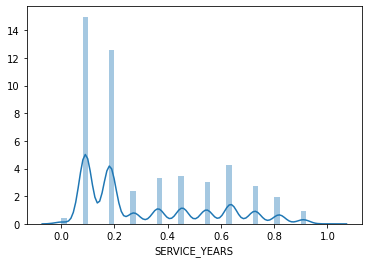

In [61]:
sns.distplot(df_feature['SERVICE_YEARS'])

In [62]:
df.corr()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE
AGE,1.000000,-0.632189,0.143623
CUSTOMER_SINCE,-0.632189,1.000000,-0.168327
PAST_PURCHASE,0.143623,-0.168327,1.000000


In [63]:
df_feature.corr()[df_feature.corr()>0.7]

,OCCUPATION,INCOME_GROUP,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Yes,AGE,PAST_PURCHASE,SERVICE_YEARS
OCCUPATION,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
INCOME_GROUP,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Andhra Pradesh,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Arunachal Pradesh,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Assam,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bihar,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chandigarh,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chhattisgarh,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Delhi,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Goa,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [64]:
df_target.value_counts()

No     114537
Yes     35463
Name: PURCHASE, dtype: int64

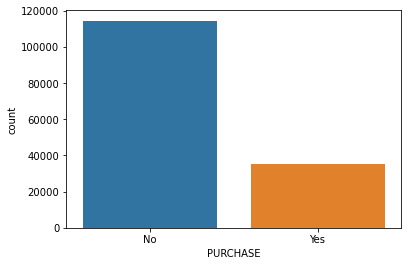

In [65]:
sns.countplot(df_target)

In [66]:
for i in range(len(df_target)):
    if df_target[i] == 'No':
        df_target[i] = 0
    else:
        df_target[i] = 1
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

In [67]:
df_feature.shape

(150000, 39)

In [68]:
df_target.shape

(150000,)

# Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_feature,df_target,random_state=1, test_size=0.2)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (120000, 39)
y_train (120000,)
X_test (30000, 39)
y_test (30000,)


# Base_Model

In [70]:
logreg = LogisticRegression()

In [71]:
model_full = logreg.fit(X_train,y_train)

In [72]:
y_pred_base_train = model_full.predict(X_train)
y_pred_base_test = model_full.predict(X_test)

In [73]:
confusion_matrix(y_train,y_pred_base_train)

array([[86958,  4578],
       [22841,  5623]], dtype=int64)

In [74]:
confusion_matrix(y_test,y_pred_base_test)

array([[21834,  1167],
       [ 5609,  1390]], dtype=int64)

In [75]:
print("For train data\n",classification_report(y_train,y_pred_base_train))
print("For test data\n",classification_report(y_test,y_pred_base_test))

For train data
               precision    recall  f1-score   support

           0       0.79      0.95      0.86     91536
           1       0.55      0.20      0.29     28464

    accuracy                           0.77    120000
   macro avg       0.67      0.57      0.58    120000
weighted avg       0.73      0.77      0.73    120000

For test data
               precision    recall  f1-score   support

           0       0.80      0.95      0.87     23001
           1       0.54      0.20      0.29      6999

    accuracy                           0.77     30000
   macro avg       0.67      0.57      0.58     30000
weighted avg       0.74      0.77      0.73     30000



# SMOTE

In [76]:
sm = SMOTE(random_state = 1)
X_train_res,y_train_res = sm.fit_resample(X_train, y_train)

In [77]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (183072, 39)
After OverSampling, the shape of train_y: (183072,) 

After OverSampling, counts of label '1': 91536
After OverSampling, counts of label '0': 91536


In [78]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
y_pred_res_train = lr1.predict(X_train_res)
y_pred_res_test = lr1.predict(X_test)
  

In [79]:
print("For train data\n",classification_report(y_train_res,y_pred_res_train))
print("For test data\n",classification_report(y_test,y_pred_res_test))

For train data
               precision    recall  f1-score   support

           0       0.69      0.68      0.68     91536
           1       0.68      0.69      0.69     91536

    accuracy                           0.68    183072
   macro avg       0.68      0.68      0.68    183072
weighted avg       0.68      0.68      0.68    183072

For test data
               precision    recall  f1-score   support

           0       0.88      0.68      0.77     23001
           1       0.40      0.70      0.51      6999

    accuracy                           0.68     30000
   macro avg       0.64      0.69      0.64     30000
weighted avg       0.77      0.68      0.71     30000



# NearMiss Algorithm:

In [80]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 28464
Before Undersampling, counts of label '0': 91536 

After Undersampling, the shape of train_X: (56928, 39)
After Undersampling, the shape of train_y: (56928,) 

After Undersampling, counts of label '1': 28464
After Undersampling, counts of label '0': 28464


# Base Model after handling imbalance

In [81]:

# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss)

y_pred_miss_train = lr2.predict(X_train_miss)
y_pred_miss_test = lr2.predict(X_test)


In [82]:
print(confusion_matrix(y_train_miss,y_pred_miss_train))
print(confusion_matrix(y_test,y_pred_miss_test))

[[22557  5907]
 [ 6438 22026]]
[[12086 10915]
 [ 1576  5423]]


In [83]:
print("For train data\n",classification_report(y_train_miss,y_pred_miss_train))
print("For test data\n",classification_report(y_test,y_pred_miss_test))

For train data
               precision    recall  f1-score   support

           0       0.78      0.79      0.79     28464
           1       0.79      0.77      0.78     28464

    accuracy                           0.78     56928
   macro avg       0.78      0.78      0.78     56928
weighted avg       0.78      0.78      0.78     56928

For test data
               precision    recall  f1-score   support

           0       0.88      0.53      0.66     23001
           1       0.33      0.77      0.46      6999

    accuracy                           0.58     30000
   macro avg       0.61      0.65      0.56     30000
weighted avg       0.76      0.58      0.61     30000



# Decision Tree using Undersample data

In [84]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_miss, y_train_miss)


In [85]:
y_pred_decision_train = decision_tree.predict(X_train_miss)
y_pred_decision_test = decision_tree.predict(X_test)

In [86]:
print("For train data\n",confusion_matrix(y_train_miss,y_pred_decision_train))
print("For test data\n",confusion_matrix(y_test,y_pred_decision_test))

For train data
 [[28464     0]
 [   18 28446]]
For test data
 [[ 8693 14308]
 [ 1477  5522]]


In [87]:
print("For train data\n",classification_report(y_train_miss,y_pred_decision_train))
print("For test data\n",classification_report(y_test,y_pred_decision_test))

For train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28464
           1       1.00      1.00      1.00     28464

    accuracy                           1.00     56928
   macro avg       1.00      1.00      1.00     56928
weighted avg       1.00      1.00      1.00     56928

For test data
               precision    recall  f1-score   support

           0       0.85      0.38      0.52     23001
           1       0.28      0.79      0.41      6999

    accuracy                           0.47     30000
   macro avg       0.57      0.58      0.47     30000
weighted avg       0.72      0.47      0.50     30000



In [88]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 6,
                                  min_samples_split = 5,
                                  max_leaf_nodes = 6,
                                  random_state = 1)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train_miss,y_train_miss)





In [89]:
y_pred_dt_train = dt_model.predict(X_train_miss)
y_pred_dt_test = dt_model.predict(X_test)

In [90]:
print("For train data\n",confusion_matrix(y_train_miss,y_pred_dt_train))
print("For test data\n",confusion_matrix(y_test,y_pred_dt_test))

For train data
 [[19060  9404]
 [ 2708 25756]]
For test data
 [[ 9534 13467]
 [  716  6283]]


In [91]:
print("For train data\n",classification_report(y_train_miss,y_pred_dt_train))
print("For test data\n",classification_report(y_test,y_pred_dt_test))

For train data
               precision    recall  f1-score   support

           0       0.88      0.67      0.76     28464
           1       0.73      0.90      0.81     28464

    accuracy                           0.79     56928
   macro avg       0.80      0.79      0.78     56928
weighted avg       0.80      0.79      0.78     56928

For test data
               precision    recall  f1-score   support

           0       0.93      0.41      0.57     23001
           1       0.32      0.90      0.47      6999

    accuracy                           0.53     30000
   macro avg       0.62      0.66      0.52     30000
weighted avg       0.79      0.53      0.55     30000



In [92]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 6,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 1)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train_miss, y_train_miss)

In [93]:
y_pred_dt_train = dt_model.predict(X_train_miss)
y_pred_dt_test = dt_model.predict(X_test)

In [94]:
confusion_matrix(y_train_miss,y_pred_dt_train)

array([[19742,  8722],
       [ 3158, 25306]], dtype=int64)

In [95]:
confusion_matrix(y_test,y_pred_dt_test)

array([[10324, 12677],
       [  814,  6185]], dtype=int64)

In [96]:
print(classification_report(y_train_miss,y_pred_dt_train))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77     28464
           1       0.74      0.89      0.81     28464

    accuracy                           0.79     56928
   macro avg       0.80      0.79      0.79     56928
weighted avg       0.80      0.79      0.79     56928



In [97]:
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.93      0.45      0.60     23001
           1       0.33      0.88      0.48      6999

    accuracy                           0.55     30000
   macro avg       0.63      0.67      0.54     30000
weighted avg       0.79      0.55      0.58     30000



# Decision Tree using SMOTE data

In [98]:
dt_model_smote = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 6,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 1)

# use fit() to fit the model on the train set
dt_model_smote = dt_model_smote.fit(X_train_res, y_train_res)

In [99]:
y_pred_dtsmote_train = dt_model_smote.predict(X_train_res)
y_pred_dtsmote_test = dt_model_smote.predict(X_test)

In [100]:
print("For train data\n",confusion_matrix(y_train_res,y_pred_dtsmote_train))
print("For test data\n",confusion_matrix(y_test,y_pred_dtsmote_test))

For train data
 [[24747 66789]
 [14291 77245]]
For test data
 [[ 6253 16748]
 [ 1221  5778]]


In [101]:
print("For train data\n",classification_report(y_train_res,y_pred_dtsmote_train))
print("For test data\n",classification_report(y_test,y_pred_dtsmote_test))

For train data
               precision    recall  f1-score   support

           0       0.63      0.27      0.38     91536
           1       0.54      0.84      0.66     91536

    accuracy                           0.56    183072
   macro avg       0.59      0.56      0.52    183072
weighted avg       0.59      0.56      0.52    183072

For test data
               precision    recall  f1-score   support

           0       0.84      0.27      0.41     23001
           1       0.26      0.83      0.39      6999

    accuracy                           0.40     30000
   macro avg       0.55      0.55      0.40     30000
weighted avg       0.70      0.40      0.41     30000



# KNN Classification Algo with undersampling

In [102]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train_miss,y_train_miss)

In [103]:
y_pred_knn_train = knn_model.predict(X_train_miss)
y_pred_knn_test = knn_model.predict(X_test)

In [104]:
print("For train data\n",confusion_matrix(y_train_miss,y_pred_knn_train))
print("For test data\n",confusion_matrix(y_test,y_pred_knn_test))

For train data
 [[25961  2503]
 [ 4356 24108]]
For test data
 [[ 9374 13627]
 [ 1419  5580]]


In [105]:
print("For train data\n",classification_report(y_train_miss,y_pred_knn_train))
print("For test data\n",classification_report(y_test,y_pred_knn_test))

For train data
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     28464
           1       0.91      0.85      0.88     28464

    accuracy                           0.88     56928
   macro avg       0.88      0.88      0.88     56928
weighted avg       0.88      0.88      0.88     56928

For test data
               precision    recall  f1-score   support

           0       0.87      0.41      0.55     23001
           1       0.29      0.80      0.43      6999

    accuracy                           0.50     30000
   macro avg       0.58      0.60      0.49     30000
weighted avg       0.73      0.50      0.52     30000



# KNN Classification Algo with SMOTE data

In [106]:
knn_classification_smote = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model_smote = knn_classification_smote.fit(X_train_res,y_train_res)

In [107]:
y_pred_knnsmote_train = knn_model_smote.predict(X_train_res)
y_pred_knnsmote_test = knn_model_smote.predict(X_test)

In [108]:
print("For train data\n",confusion_matrix(y_train_res,y_pred_knnsmote_train))
print("For test data\n",confusion_matrix(y_test,y_pred_knnsmote_test))

For train data
 [[77098 14438]
 [ 6731 84805]]
For test data
 [[16627  6374]
 [ 3080  3919]]


In [109]:
print("For train data\n",classification_report(y_train_res,y_pred_knnsmote_train))
print("For test data\n",classification_report(y_test,y_pred_knnsmote_test))

For train data
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     91536
           1       0.85      0.93      0.89     91536

    accuracy                           0.88    183072
   macro avg       0.89      0.88      0.88    183072
weighted avg       0.89      0.88      0.88    183072

For test data
               precision    recall  f1-score   support

           0       0.84      0.72      0.78     23001
           1       0.38      0.56      0.45      6999

    accuracy                           0.68     30000
   macro avg       0.61      0.64      0.62     30000
weighted avg       0.74      0.68      0.70     30000



# Random_forest with undersampling

In [110]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 1)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train_miss,y_train_miss)

In [111]:
y_pred_rf_train = rf_model.predict(X_train_miss)
y_pred_rf_test = rf_model.predict(X_test)

In [112]:
print("For train data\n",confusion_matrix(y_train_miss,y_pred_rf_train))
print("For test data\n",confusion_matrix(y_test,y_pred_rf_test))

For train data
 [[28242   222]
 [  871 27593]]
For test data
 [[ 8706 14295]
 [ 1307  5692]]


In [113]:
print("For train data\n",classification_report(y_train_miss,y_pred_rf_train))
print("For test data\n",classification_report(y_test,y_pred_rf_test))

For train data
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     28464
           1       0.99      0.97      0.98     28464

    accuracy                           0.98     56928
   macro avg       0.98      0.98      0.98     56928
weighted avg       0.98      0.98      0.98     56928

For test data
               precision    recall  f1-score   support

           0       0.87      0.38      0.53     23001
           1       0.28      0.81      0.42      6999

    accuracy                           0.48     30000
   macro avg       0.58      0.60      0.47     30000
weighted avg       0.73      0.48      0.50     30000



# Random_forest using SMOTE data

In [114]:
rf_classification_smote = RandomForestClassifier(n_estimators = 10, random_state = 1)

# use fit() to fit the model on the train set
rf_model_smote = rf_classification_smote.fit(X_train_res,y_train_res)

In [115]:
y_pred_rfsmote_train = rf_model_smote.predict(X_train_res)
y_pred_rfsmote_test = rf_model_smote.predict(X_test)

In [116]:
print("For train data\n",confusion_matrix(y_train_res,y_pred_rfsmote_train))
print("For test data\n",confusion_matrix(y_test,y_pred_rfsmote_test))

For train data
 [[91020   516]
 [ 1754 89782]]
For test data
 [[18907  4094]
 [ 3884  3115]]


In [117]:
print("For train data\n",classification_report(y_train_res,y_pred_rfsmote_train))
print("For test data\n",classification_report(y_test,y_pred_rfsmote_test))

For train data
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     91536
           1       0.99      0.98      0.99     91536

    accuracy                           0.99    183072
   macro avg       0.99      0.99      0.99    183072
weighted avg       0.99      0.99      0.99    183072

For test data
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     23001
           1       0.43      0.45      0.44      6999

    accuracy                           0.73     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.74      0.73      0.74     30000



 Optimal Value of K (using GridSearchCV)

# K Fold Cross Validation

In [120]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, random_state=None)
model = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X_train_miss):
    X_train , X_test = X_train_miss.iloc[train_index,:],X_train_miss.iloc[test_index,:]
    y_train , y_test = y_train_miss[train_index] , y_train_miss[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.22940453188125767, 0.6625680660460215, 0.7574213946952397, 0.6994554716318285, 0.5487440716669594, 0.7581240119444932, 0.770419813806429, 0.7609344809415071, 0.7584328882642305, 0.7680955727336612]
Avg accuracy : 0.6713600303611627


In [121]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X_train_res):
    X_train , X_test = X_train_res.iloc[train_index,:],X_train_res.iloc[test_index,:]
    y_train , y_test = y_train_res[train_index] , y_train_res[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7596679047410968, 0.7620166047629452, 0.7614027421205004, 0.7550117441415852, 0.7619489812639973, 0.7589446659747637, 0.828262413284536, 0.8881848473261594, 0.8897689408423007, 0.8863822581526192]
Avg accuracy : 0.8051591102610505


# TEST DATA PREPARATION

In [122]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,150001,Maharashtra,50,Self employed,Medium,2018,No,12746
1,150002,Maharashtra,58,Self employed,High,2011,Yes,12277
2,150003,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,150004,Mizoram,27,Salaried,Low,2018,Yes,9665
4,150005,Uttar Pradesh,67,,Medium,2014,No,15724


In [123]:
df_test.shape

(50000, 8)

In [124]:
df_test['STATE'].replace(' ','Others',inplace=True)

df_test['OCCUPATION'].replace(" ","Unemployed",inplace=True)

df_test['INCOME_GROUP'].replace(" ","No Income",inplace=True)

df_test.ffill(axis=0,inplace=True)

ordinalencode = OrdinalEncoder(categories=[['No Income','Low','Medium','High']])

df_test['INCOME_GROUP'] = ordinalencode.fit_transform(df_test[['INCOME_GROUP']])

df_test['INCOME_GROUP'] = df_test['INCOME_GROUP'].astype(int)

labelencode = LabelEncoder()

df_test['OCCUPATION'] = labelencode.fit_transform(df_test['OCCUPATION'])

df_test['SERVICE_YEARS'] = (pd.datetime.now().year) - df_test['CUSTOMER_SINCE']

df_test.drop(['CUSTOMER_SINCE'],axis=1,inplace=True)

state_dummies = pd.get_dummies(df_test['STATE'],drop_first=True)

df_test = pd.concat([df_test,state_dummies],axis=1)

df_test.drop(['STATE'],axis=1,inplace=True)

loyalty_dummies = pd.get_dummies(df_test['LOYALTY_PROGRAM'],drop_first=True)

df_test.drop(['LOYALTY_PROGRAM'],axis=1,inplace=True)

df_test = pd.concat([df_test,loyalty_dummies],axis=1)

print(df_test.shape)


(50000, 40)


In [125]:
age = df_test['AGE']
past_purchase = df_test['PAST_PURCHASE']
service_years = df_test['SERVICE_YEARS']

In [126]:
df_test.drop(['AGE','PAST_PURCHASE','SERVICE_YEARS'],axis=1,inplace=True)

In [127]:
df_test.head()

,ID,OCCUPATION,INCOME_GROUP,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Yes
0,150001,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,150002,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,150003,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,150004,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,150005,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [128]:
df_test['AGE'] = age.apply(lambda x : (x-23)/(85-23))
df_test['PAST_PURCHASE'] = past_purchase.apply(lambda x : (x-208)/(103520-208))
df_test['SERVICE_YEARS'] = service_years.apply(lambda x : (x-2)/(13-2))

In [129]:
df_ID = df_test['ID']

In [130]:
df_test.drop('ID',axis=1,inplace=True)

In [131]:
df_test.head()

,OCCUPATION,INCOME_GROUP,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Others,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Yes,AGE,PAST_PURCHASE,SERVICE_YEARS
0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.435484,0.121361,0.090909
1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.564516,0.116821,0.727273
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.112903,0.156739,0.181818
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.064516,0.091538,0.090909
4,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.709677,0.150186,0.454545


In [132]:
y_test_predict = rf_model_smote.predict(df_test)

In [133]:
y_test_predict

array([1, 1, 0, ..., 0, 0, 0])

In [134]:
y_pred_series = pd.Series(y_test_predict,name='PURCHASE')

In [135]:
y_pred_series.head()

0    1
1    1
2    0
3    0
4    0
Name: PURCHASE, dtype: int32

In [136]:
result = pd.DataFrame(pd.concat([df_ID,y_pred_series],axis=1))

In [137]:
result.head()

,ID,PURCHASE
0,150001,1
1,150002,1
2,150003,0
3,150004,0
4,150005,0


In [138]:
result.to_csv('FINAL SUBMISSION_SUSHMA_D.csv',index=False)